# w207 Final Project - Forest Cover Type Prediction

Team:
   - Diana Chacon
   - Jyoti Kumari
   - Malachy Moran

Date: Aug 01, 2021

We have applied most of the classifiers and algorithms for supervised learning, that we studied during w207 MIDS course, starting from week 1 to week 9. These are listed below in the sequence per week:

- k Nearest Neighbors (week 2)
- Naive Bayes (Week 3)
- Decision trees, including Random Forests, Adaboost and Gradient Boosting (week 4)
- Logistic regression (week 5)
- Stochastic Gradient Descent (week 6)
- Support Vector machine (week 8)


#### *The accuracy of the best model will be reported on the dev data, since test data does not have labels. The scope of this project does not include outputting results for the kaggle "test" data set, since the kaggle competion is no longer open.*

- *There will be no loading or processing done on test data in this whole exercise.*

### Import Libraries

In [1]:
# General libraries.
#!pip install -U seaborn
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature preprocessing.
from sklearn import preprocessing

# SK-learn libraries for dimensionality reduction.
from sklearn.decomposition import PCA

# Data analysis and plotting 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import copy

np.random.seed(0)
print ("OK")
#import tensorflow as tf
#print("Tensorflow version", tf.__version__)

%matplotlib inline


OK


# Part 1: Data Loading, Processing and Exploratory Data Analysis

### Dataset Description


**Labels**

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

**Data Fields**

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

- 1 - Rawah Wilderness Area
- 2 - Neota Wilderness Area
- 3 - Comanche Peak Wilderness Area
- 4 - Cache la Poudre Wilderness Area

**The soil types are:**

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

## 1.1. Data Loading

**Let's load just the training data**

In [2]:
#loading train data
train=pd.read_csv('train.csv')

train_label = train.Cover_Type #setting the last column `Cover_type` as label for train dataset.

# We also discard the 1st variable(ID), which does not provide any information about the forest cover type.
train_data = train.drop(['Id', 'Cover_Type'], axis = 1)

print(train.shape)
print(train_data.shape)
print(train_label.shape)

#loading test data
#test = pd.read_csv('test.csv')
#test_data = test.drop(['Id'], axis = 1) # Dropping first column `Id`. There are no labels in the test data


(15120, 56)
(15120, 54)
(15120,)


**Observations**

The original train dataset contains 15120 observations with 56 features.(containing both `Id` and the `Cover_Type`)

**Explaining the features:**

- All features are either continous or binary. There are no text fields.
- Soil_Type fields are binary.
- Wilderness Area fields are binary.
- Without considering the first column, `ID`, The first 10 features of each observation (`Elevation` to `Horizontal_Distance_To_Fire_Points`) are continuous, with different ranges. All 10 features are numeric variables.
- 4 of the remaining 44 binary features correspond to `Wilderness_Area` (i.e., there are 4 possible types), so any observation will have one 1 and three 0's in those columns. 
- The last 40 features correspond to the `Soil_Type` (i.e., there are 40 possible types), so any observation will have one 1 and thirty-nine 0's in those columns.


**Training datset:**

There are a total of 15120 observations in the training set, that contains 55 features and the `Cover_Type`.

As a part of data processing,

  - *The first column has been dropped, since it is not really a feature but more of an observation ID*
 
  - *The last column is the train_label*

This finally gives us a train dataset with **15120 observations** and **54 features**.


### Split training data into training and validation data (dev)

*To evaluate our performance, we'll split the training set in 2 subsets: training data (67%) and development or validation data (33%).*

*Test data must not be used to validate the models, because it introduces bias. Test data must be looked at just once in the whole model building process. Looking at test data multiple times introduces bias and we end up learning the error rate on test data beforehand and try to tweak the training parameters, which is not recommended.*

In [3]:
# Shuffle the data, but make sure that the features and accompanying labels stay in sync.

np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
#train_data = train_data.iloc[shuffle,:]
train_data, train_label = train_data.iloc[shuffle], train_label.iloc[shuffle]

# Split into train (67%) and dev (33%)

train_data, dev_data, train_label, dev_label = train_test_split(train_data, train_label, train_size=0.90)

print(train_data.shape)
print(train_label.shape)
print(dev_data.shape)
print(dev_label.shape)

(13608, 54)
(13608,)
(1512, 54)
(1512,)


## 1.2. Exploratory Data Analysis

**Step 1: Describe the dataset**

In [4]:
all_data=pd.read_csv('train.csv')

print(all_data.head())

all_data.columns

   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220          

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

**Step 2: Look for unique values**

In [5]:
#Looking for the total number of unique values by column
all_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

**Step 3: Look for NA values**

In [6]:
#Checking for any na values
all_data.isna().sum()
#Result says we have none

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


**Observation:**

There are no NA values in the data.

**Step4: looking for outliers or miscoded values**

In [7]:
#looking for outliers or miscoded values
all_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


**Step 5: Let's take a look at the distribution of values, for the continuous variables**

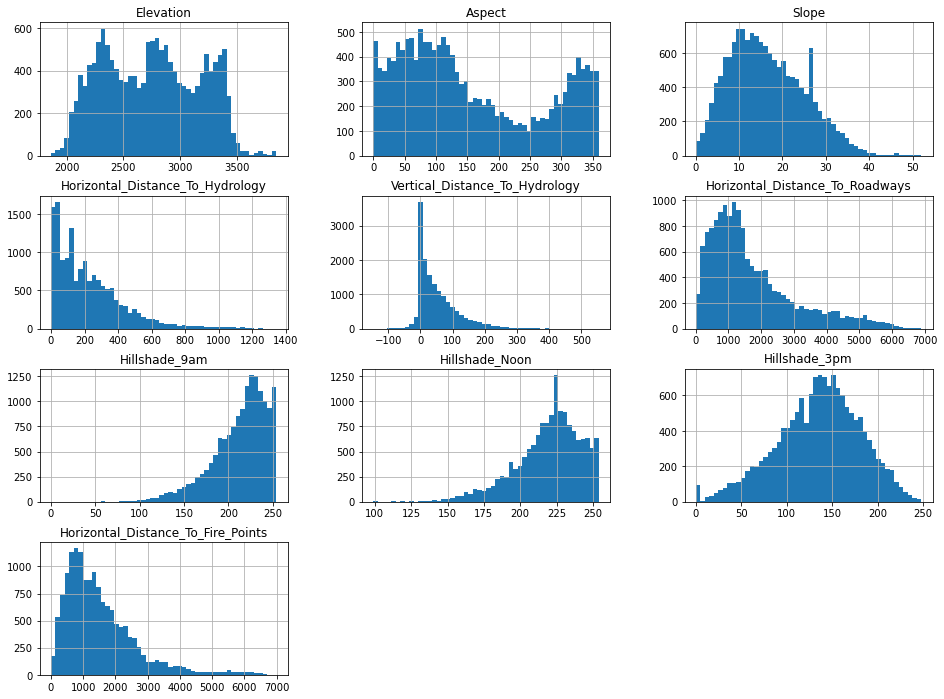

In [8]:
train_df = all_data.iloc[:,1:11]
train_df.hist(figsize=(16,12),bins=50)
plt.show()

We noticed that the histogram of `Hillshade_3pm` contains several 0's, in the training set, which might make us think of missing values coded with 0, but according to the dataset description, this feaure can take value as 0, so these entries are valid.

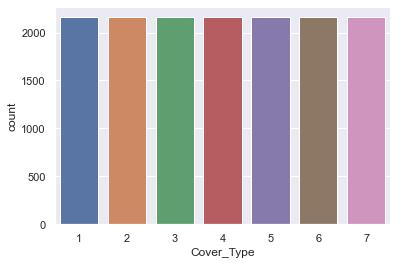

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Cover_Type", data=all_data)

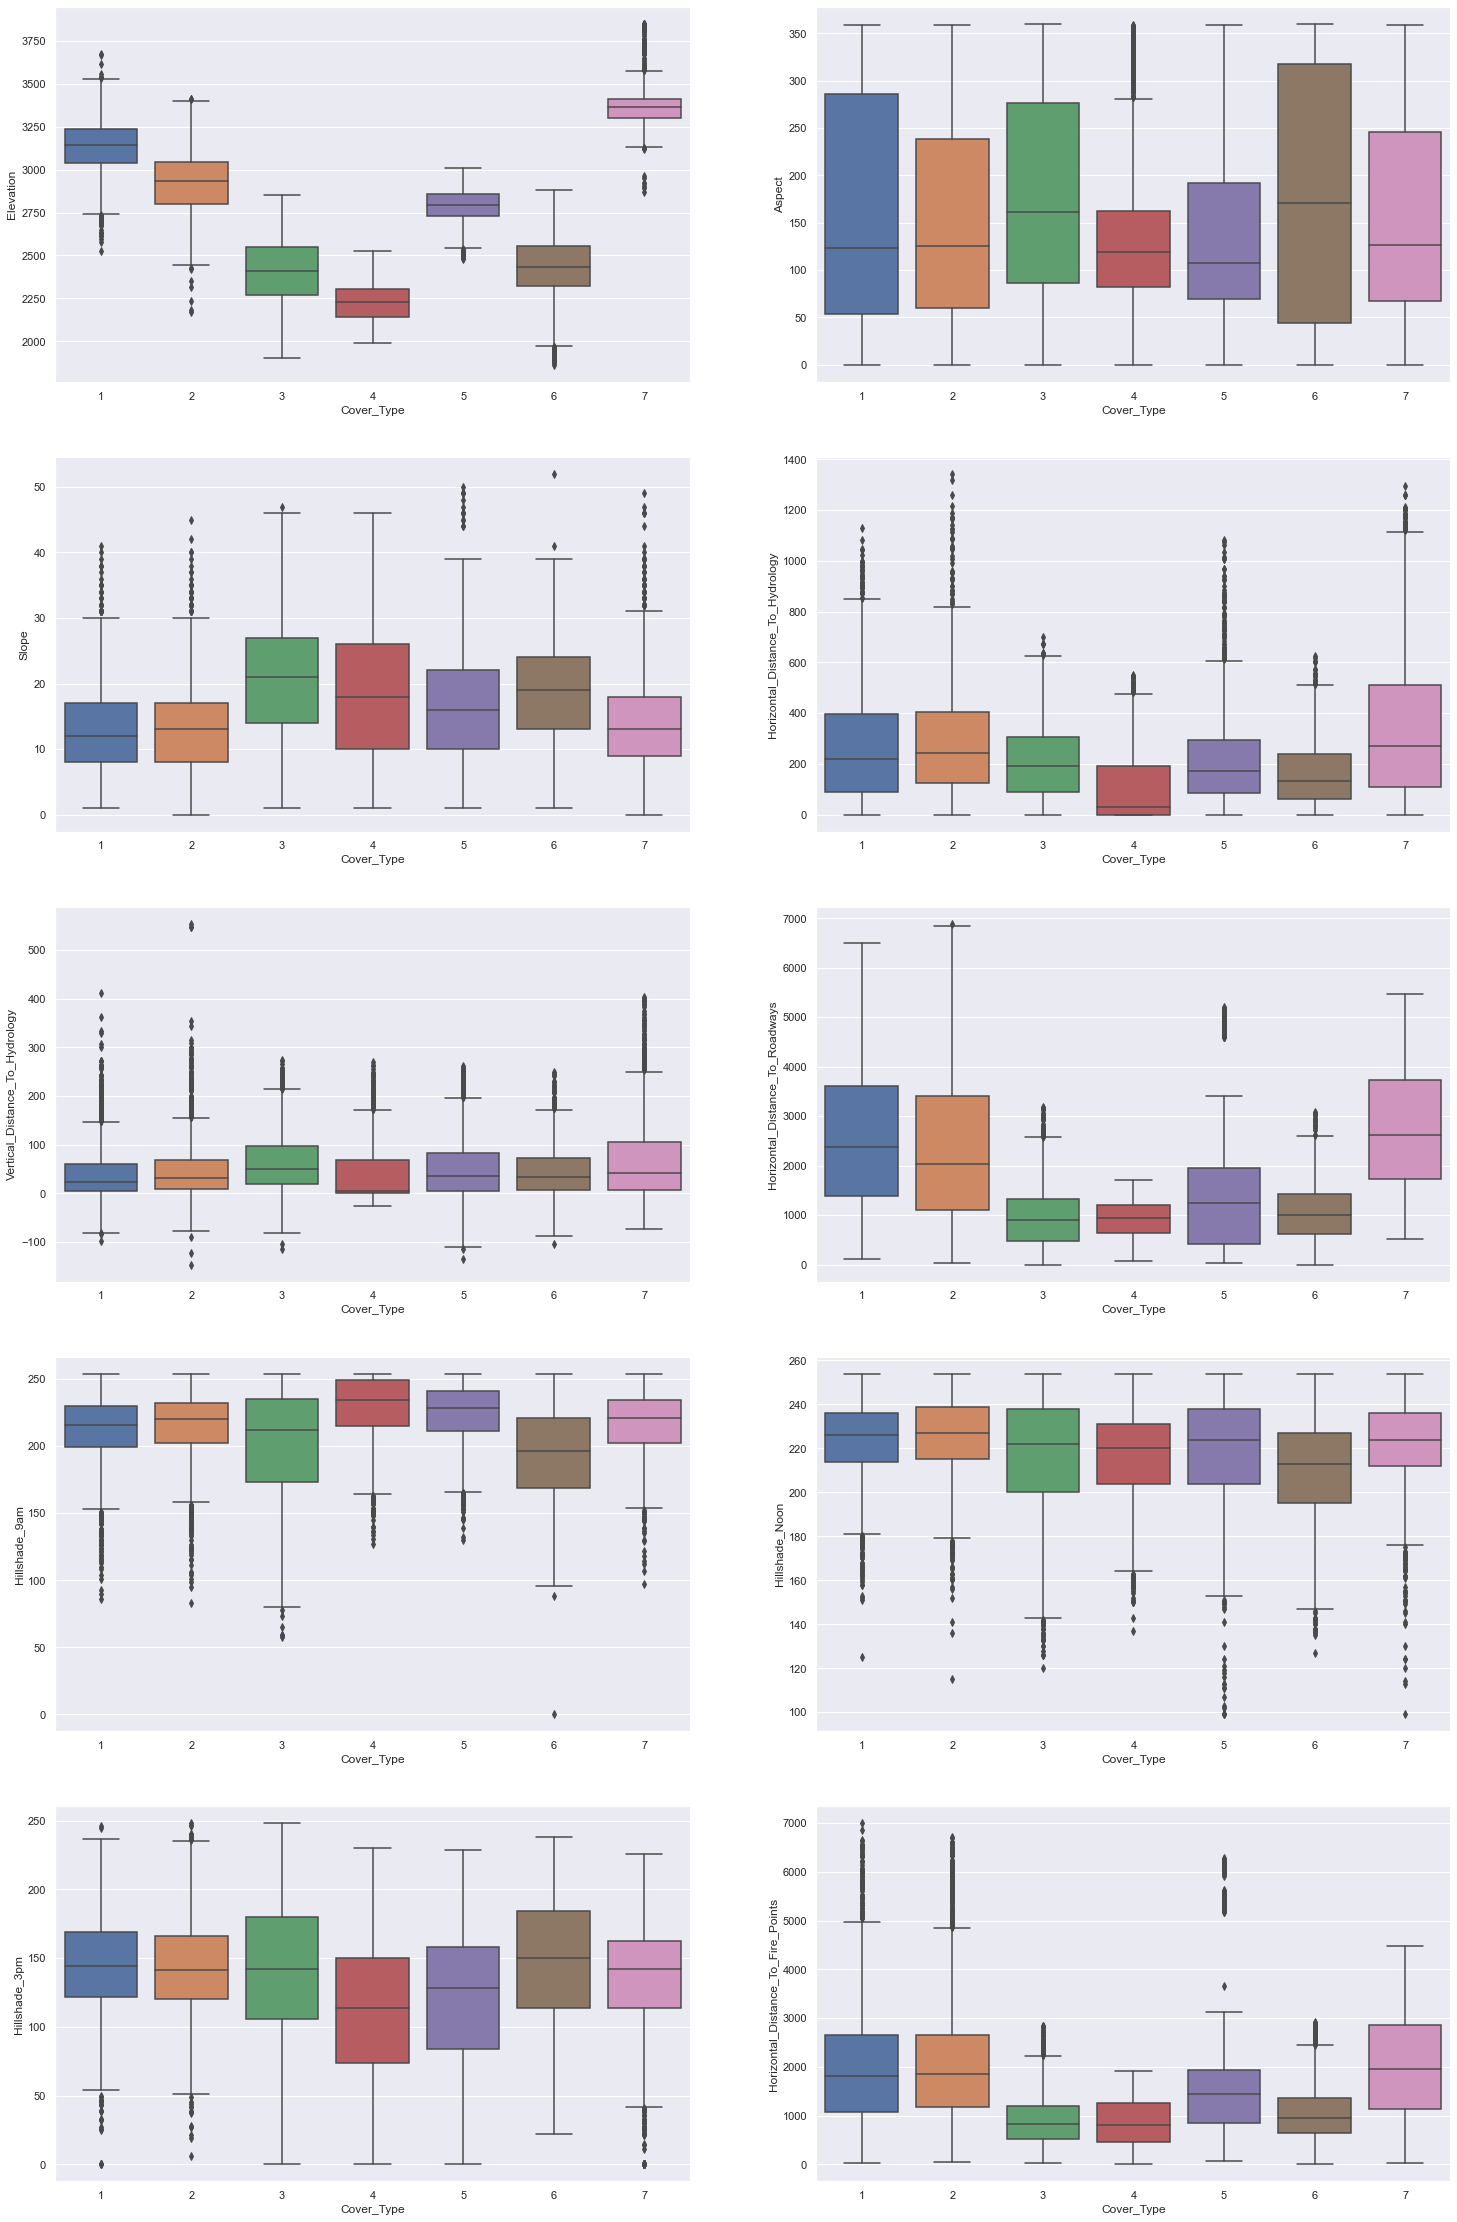

In [10]:
#Next lets look at the distribution of the numeric variables across cover types.
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.boxplot(x="Cover_Type", y=all_data.columns[i+1], data=all_data,ax=ax1);

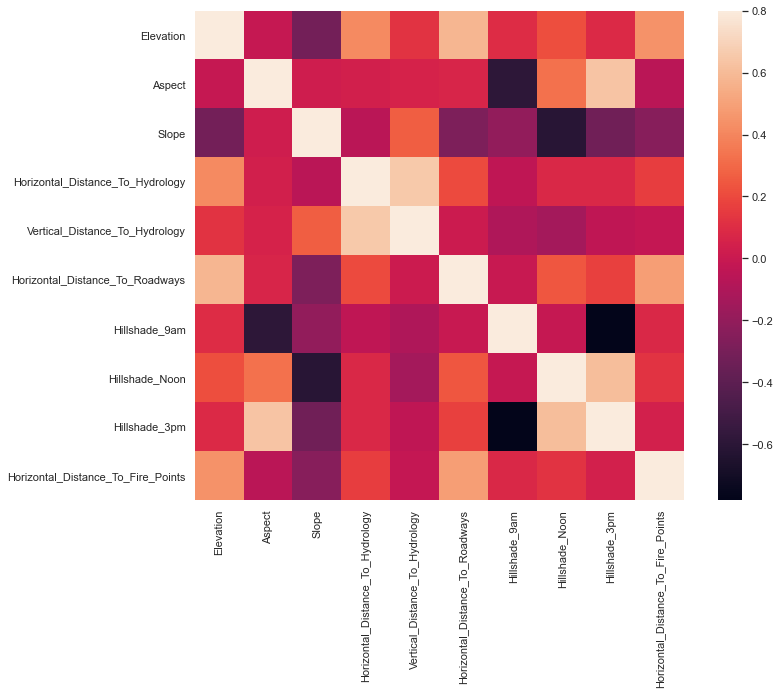

In [11]:
#let's look at the numeric predictor variables and see which are correlated
correlations = all_data.iloc[:,1:11].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlations, vmax=.8, square=True);

0        Soil_Type29
1        Soil_Type29
2        Soil_Type12
3        Soil_Type30
4        Soil_Type29
            ...     
15115     Soil_Type4
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type2
Length: 15120, dtype: object


<AxesSubplot:xlabel='soil'>

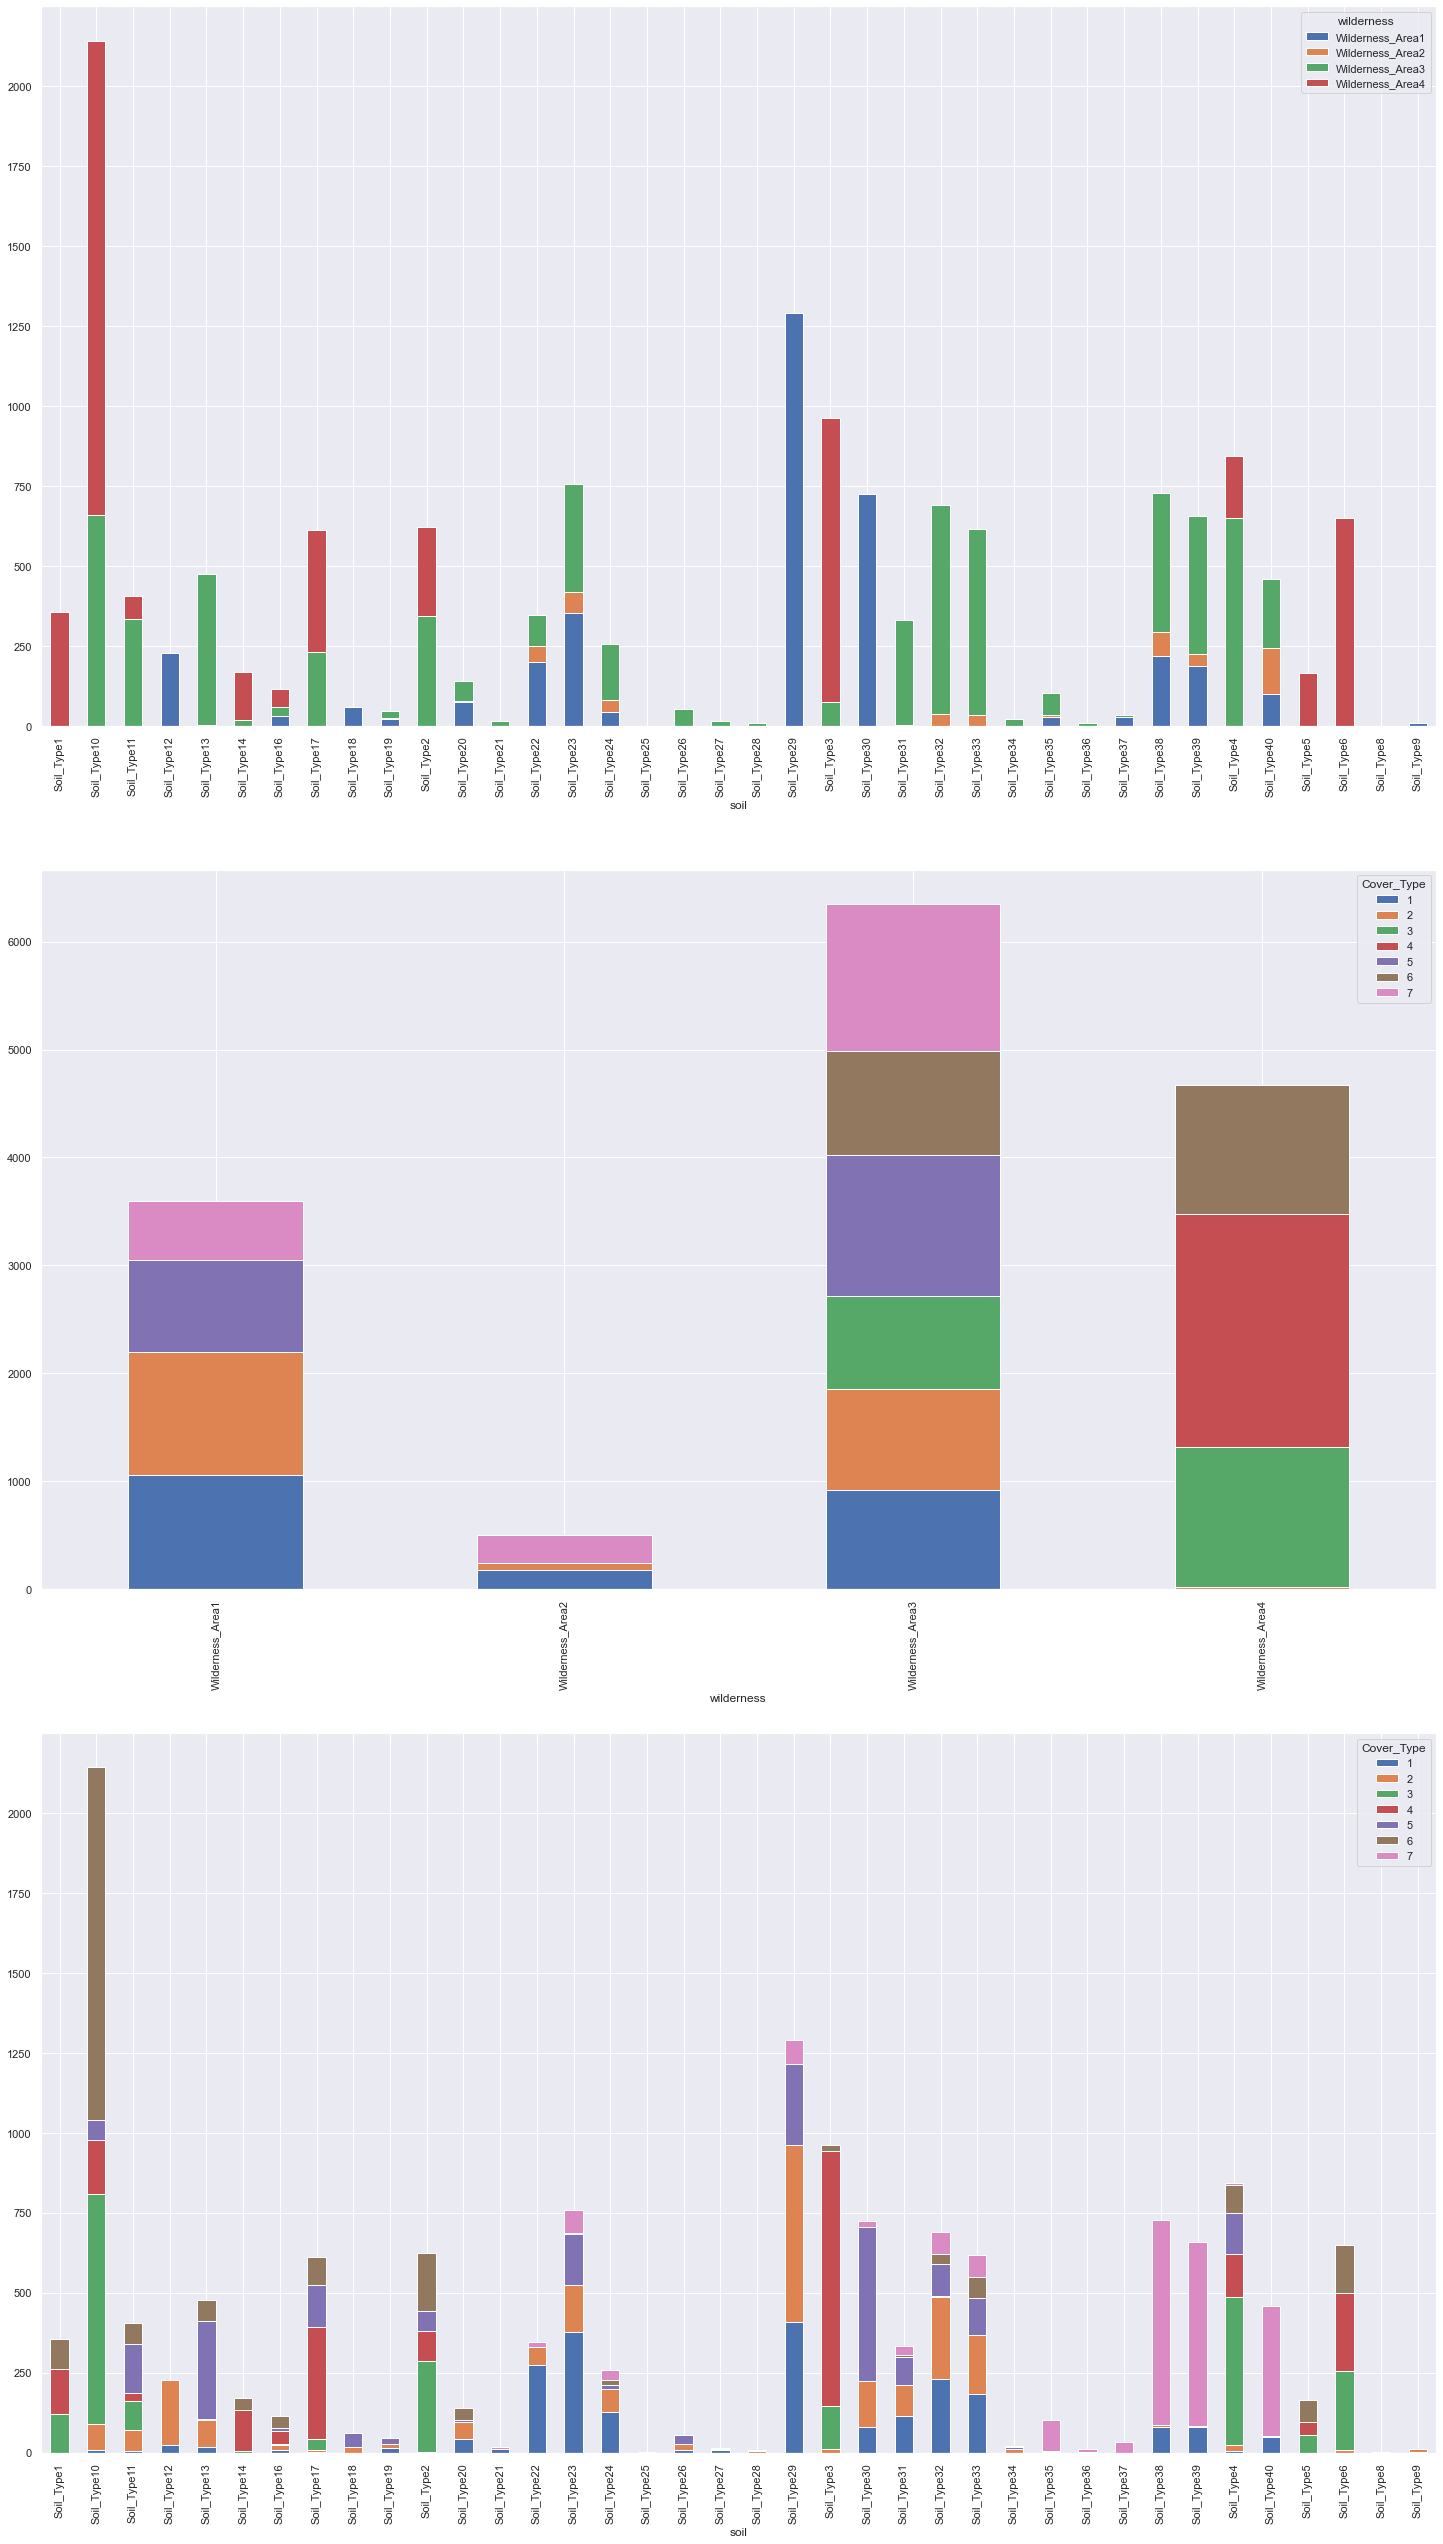

In [12]:
soil_type = all_data.iloc[:,15:55]
soil_type = pd.DataFrame(soil_type)
soil_col = pd.Series(soil_type.columns[np.where(soil_type == 1)[1]])
print(soil_col)

wild_type = all_data.iloc[:,11:15]
wild_type = pd.DataFrame(wild_type)
wild_col = pd.Series(wild_type.columns[np.where(wild_type == 1)[1]])

import copy

plot_data = copy.deepcopy(all_data)
plot_data['soil'] = soil_col
plot_data['wilderness'] = wild_col

fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (25,45))

ax1 = axes[0]
pd.crosstab(plot_data.soil, plot_data.wilderness).plot.bar(stacked = True, ax = ax1)

ax2 = axes[1]
pd.crosstab(plot_data.wilderness, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax2)

ax3 = axes[2]
pd.crosstab(plot_data.soil, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax3)

## 1.3. Data Preprocessing


In order to make continuous variable comparable to the binary features, we will be using `preprocessing.MinMaxScaler`, to standardize them by scaling each feature to a given range; [0,1].
This can help in `Logistic regression` model and `kNN` model.

We also use `preprocessing.StandardScaler`, to standardize 10 continuous feature by moving the mean and scaling to unit variance),

With scaled features, there is no surity that the model results will improve, although it is mandatory in this case, since the dataset is a combination of continuous and binary features.

In [13]:
# Scale to mean = 0, sd = 1 using StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scaler = preprocessing.StandardScaler()

train_data_std = copy.deepcopy(train_data)
dev_data_std = copy.deepcopy(dev_data)
#test_data_std = copy.deepcopy(test_data)

# only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_std.iloc[:, :10] = std_scaler.fit_transform(train_data_std.iloc[:, :10])
dev_data_std.iloc[:, :10] = std_scaler.transform(dev_data_std.iloc[:, :10])
#test_data_std.iloc[:, :10] = std_scaler.transform(test_data_std.iloc[:, :10])

# Scale to range [0,1] using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

train_data_minmax = copy.deepcopy(train_data)
dev_data_minmax = copy.deepcopy(dev_data)
#test_data_minmax = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_minmax.iloc[:, :10] = min_max_scaler.fit_transform(train_data.iloc[:, :10])
dev_data_minmax.iloc[:, :10] = min_max_scaler.transform(dev_data.iloc[:, :10])
#test_data_minmax.iloc[:, :10] = min_max_scaler.transform(test_data.iloc[:, :10])

# Feature Binarization is the process of thresholding numerical features to get boolean values,(first 10 columns in the train_data, dev_data and test_data, since they are non-binary features)
# Binarize feature values to either 0 or 1, using binarizer
binarizer = preprocessing.Binarizer()

train_data_b = copy.deepcopy(train_data)
dev_data_b = copy.deepcopy(dev_data)
#test_data_b = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_b.iloc[:, :10] = binarizer.fit_transform(train_data.iloc[:, :10])
dev_data_b.iloc[:, :10] = binarizer.transform(dev_data.iloc[:, :10])
#test_data_b.iloc[:, :10] = binarizer.transform(test_data.iloc[:, :10])

print(train_data_b.shape)
#print(train_data_b.head())


(13608, 54)


# Part 2 : Modelling

## Model 1: 
## k-Nearest Neighbors(kNN)

Let's run an experiment with Nearest Neighbors classifier, using fit() and predict() methods from the sklearn classifier implementations.

Let's start by finding the optimal k

In [14]:
# Estimate by cross-validation of the optimal number of neighbors (k)
# Try between 1 and the number of features (54)
#k = {'n_neighbors': np.concatenate([np.arange(1, train_data.shape[1]+1)]).tolist()}
# The optimal value is low, so let's narrow the search from 1 to 11
k = {'n_neighbors': np.concatenate([np.arange(1, 10+1)]).tolist()}
best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(train_data, train_label)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print ('The optimal value for k is {0}'.format(optimal_k))

The optimal value for k is 1


In [15]:
# first approach of finding kNN with different data manipulations
kNN = KNeighborsClassifier(n_neighbors=optimal_k)

kNN.fit(train_data, train_label)
print ('Accuracy using non-scaled data:      {0:.4f}'.format(kNN.score(dev_data, dev_label)))

kNN.fit(train_data_std, train_label)
print ('Accuracy using standardized data:    {0:.4f}'.format(kNN.score(dev_data_std, dev_label)))

kNN.fit(train_data_minmax, train_label)
print ('Accuracy using scaled-to-range data: {0:.4f}'.format(kNN.score(dev_data_minmax, dev_label)))

Accuracy using non-scaled data:      0.8452
Accuracy using standardized data:    0.8075
Accuracy using scaled-to-range data: 0.8234


As we can see, the model performed better with non-scaled data, although the optimal k was searched above using non-scaled data, if we calculate optimal-k even with standardized or scale_to_range data, it gives the same result.


In [16]:
# second approach of finding kNN without finding the optimal value first
#Here are our K values to try
k_values = [1, 3, 5, 7, 9]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(train_data.iloc[:, :10], train_label)
    #clf.fit(train_data, train_label)
    # Predict on the dev data
    preds = clf.predict(dev_data.iloc[:, :10])
    #preds = clf.predict(dev_data)

    # And calculate the accuracy by comparing it to the labels
    correct, total = 0, 0
    for pred, label in zip(preds, dev_label):
        if pred == label: 
            correct += 1
        total += 1

    # Finally we print the outcomes
    Outcome = ["For the model with", str(i), "Nearest Neighbors:"]
    print(" ".join(Outcome))
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    print()

For the model with 1 Nearest Neighbors:
total: 1512  correct: 1278  accuracy: 0.85

For the model with 3 Nearest Neighbors:
total: 1512  correct: 1254  accuracy: 0.83

For the model with 5 Nearest Neighbors:
total: 1512  correct: 1230  accuracy: 0.81

For the model with 7 Nearest Neighbors:
total: 1512  correct: 1188  accuracy: 0.79

For the model with 9 Nearest Neighbors:
total: 1512  correct: 1165  accuracy: 0.77



**We will proceed with the accuracy result from kNN as our baseline and will try to meet or improve the baseline using different classifiers below.**

## Model 2:
## Decision Tree

Decision trees are powerful machine learning algorithms that iteratively split the data based on binary 'Yes/No' decision criterion. This has the advantage of both working well with data that is already highly binary, such as our "Wilderness Area" and "Soil Type" variables, and being explainable to non-technical audiences. 

In order to properly utilize the Decision Tree Algorithm, our first task is to binarize all the columsn in the data. For most of our variables, this is fairly easy, as they are already structured as binary indicator variables. For our remaining numeric variables, we need to look at the distribution of our data to see if there are natural breakpoints we can utilize.

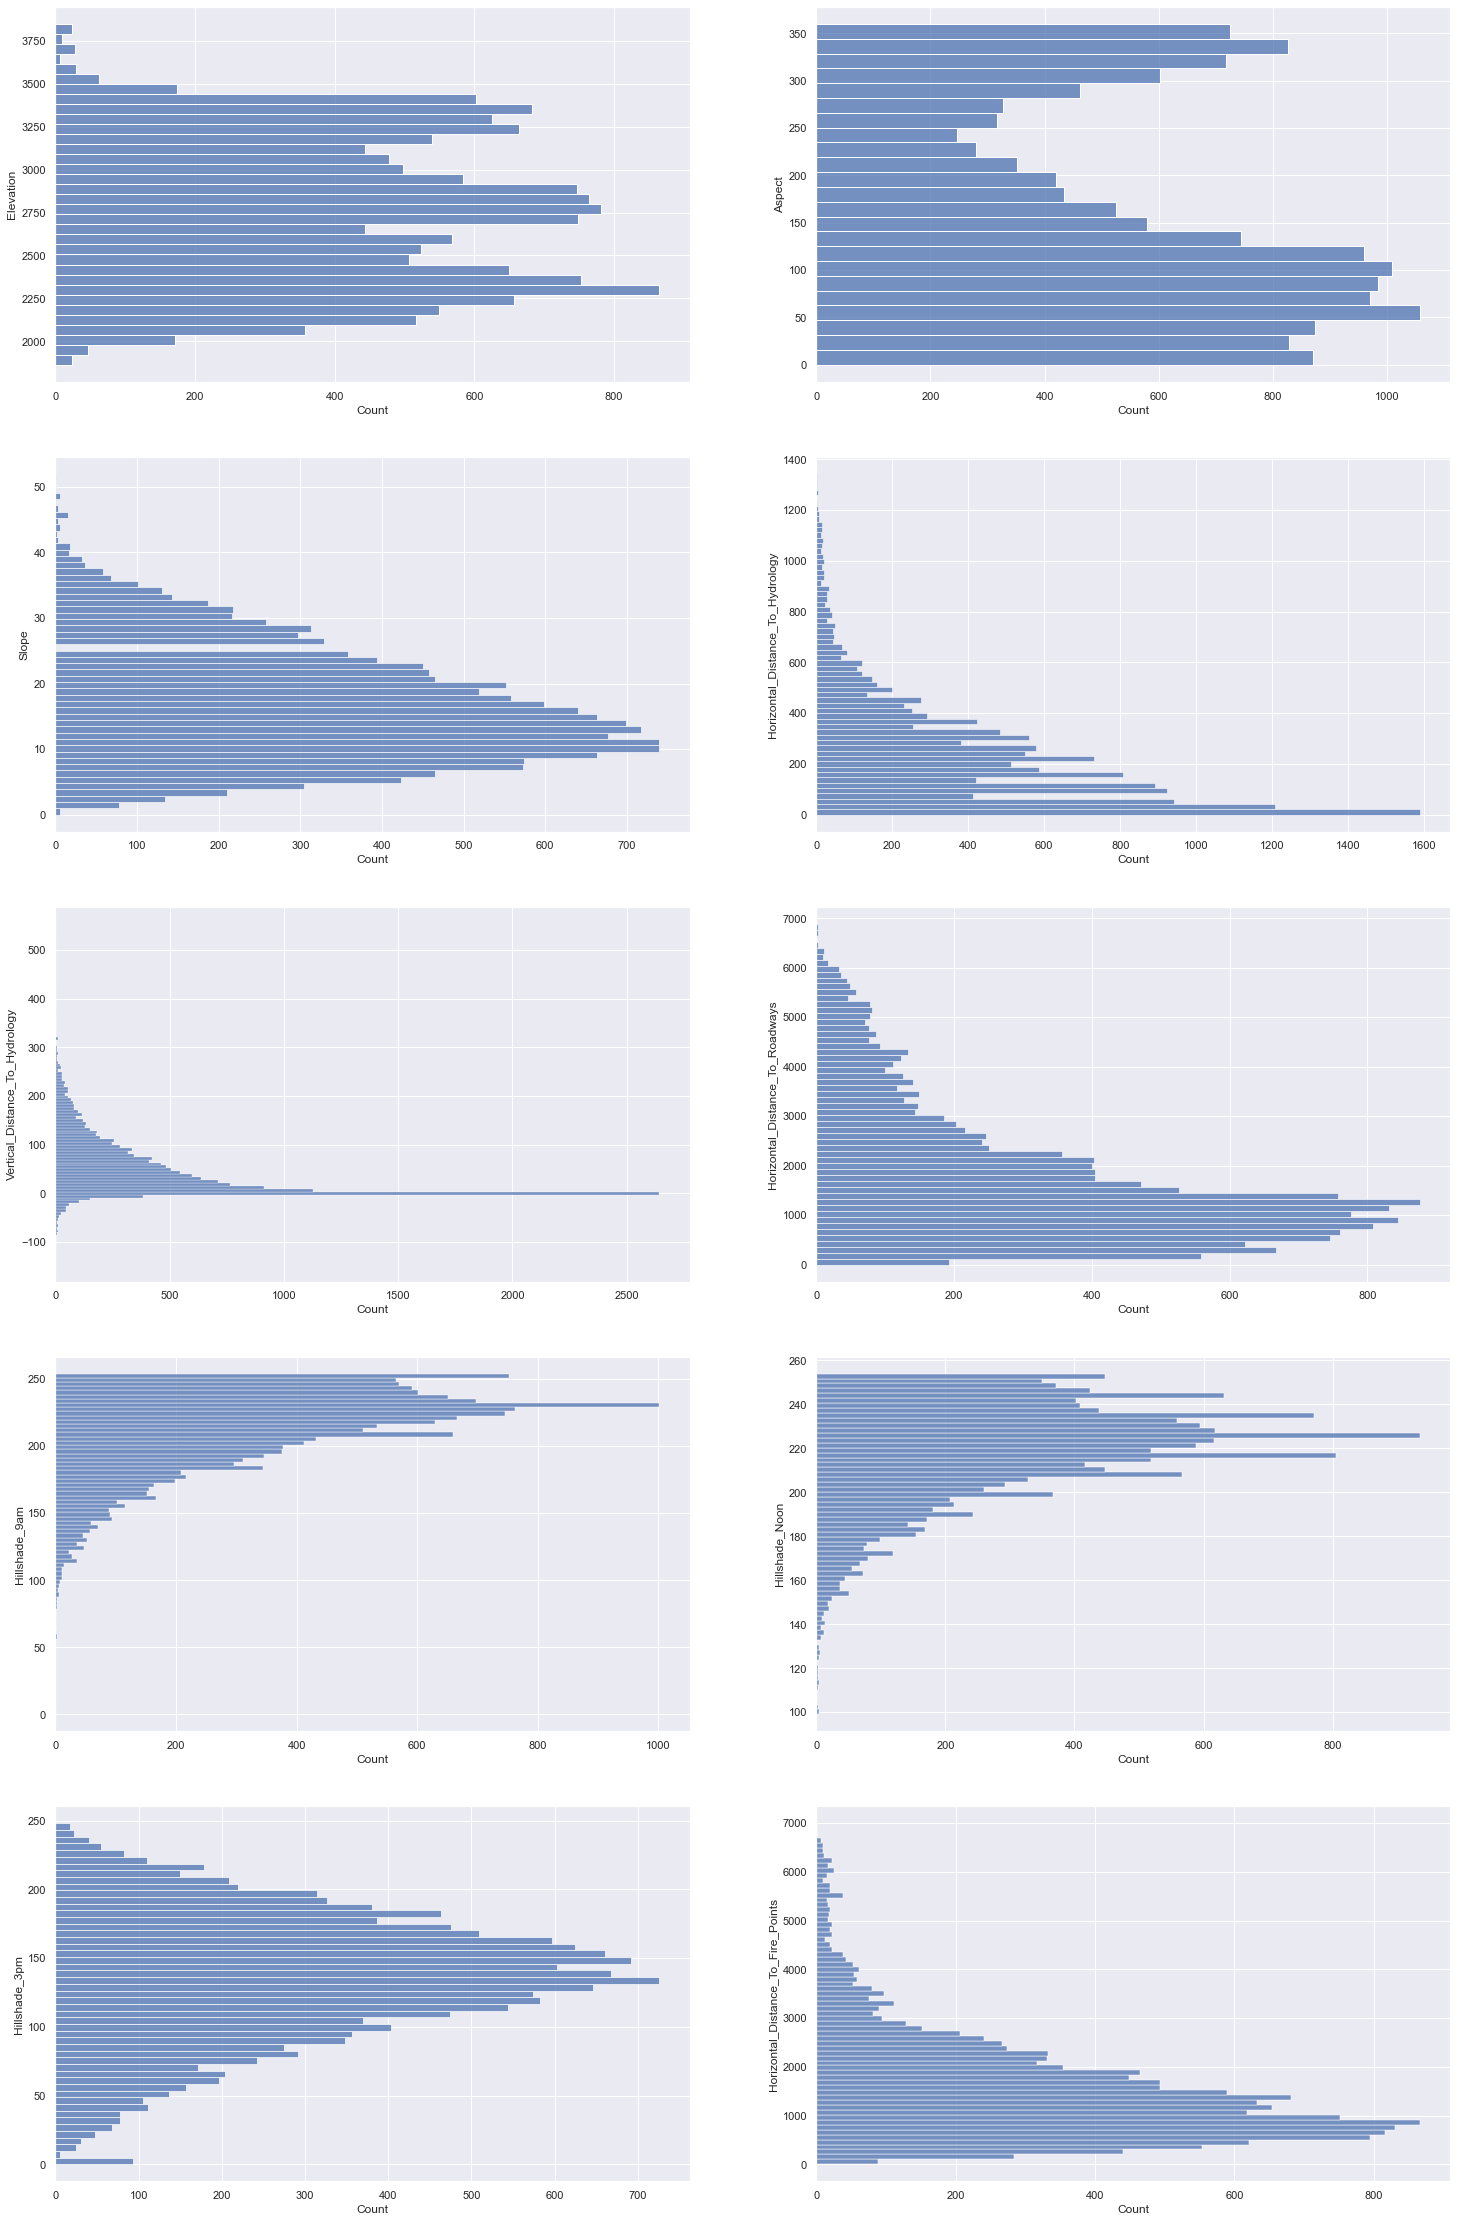

In [17]:
#Creating our plot grid
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
#Plotting our variables
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.histplot(y=all_data.columns[i+1], data=all_data,ax=ax1);

It looks like some of our variables have obvious breakpoints, while others have a fairly smooth distribution.

The variables with obvious breakpoints are:
* Elevation: Elevation looks to have 3 groups, one from 0 to about 2625, one from 2625 to 3125 and one for 3125 and above
* Aspect: Aspect seems to be split into two groups right at 250
* Slope: Slope has a gap at 26 degrees. We can try breaking here
* Horizontal_Distance_To_Hydrology: This seems to have a large amount of data below 100 feet, and a long tail above that
* Vertical_Distance_To_Hydrology: This feature seems to have an overwhelming amount of the data at exactly 0, so we will split it there

The other variables: Horizontal_Distance_To_Roadways, the Hillshade variables, and Horizontal_Distance_To_Fire_Points seem to have a fairly smooth distribution. Luckily, since we know the criterion that a decision tree will split on (information gain), we can choose to binarize our continuous variables at those points which maximize this criterion.


In [18]:
#First we will create a copy of our data that we can modify
tree_train_data = copy.deepcopy(train_data)
tree_train_labels = copy.deepcopy(train_label)
tree_dev_data = copy.deepcopy(dev_data)
tree_dev_labels = copy.deepcopy(dev_label)

In [19]:

###This block of four functions work together to find the point each variable can be split to maximize information gain.

def entropy(distribution):
    #initialize entropy at zero
    h = 0.0
    for probability in distribution:
        logprob = -100.0  # log(0) = -inf so let's approximate it with -100 to avoid an error
        if probability > 0.0: logprob = np.log2(probability)
        h -= probability * logprob
    return h

def get_label_distribution(labels):
    # Initialize counters for all labels to zero.
    label_probs = np.array([0.0 for i in range(7)])

    # Iterate over labels in the training data and update counts.
    for label in labels:
        label_probs[label-1] += 1.0
    
    # Normalize to get a distribution.
    label_probs /= label_probs.sum()
    return label_probs

def information_gain(data, labels, feature, threshold=0):
    # Get the initial entropy of the label distribution.
    initial_entropy = entropy(get_label_distribution(labels))
    
    # subset0 will contain the labels for which the feature is 0 and
    # subset1 will contain the labels for which the feature is 1.
    subset0, subset1 = [], []
    for datum, label in zip(data, labels):
        if datum[feature] > threshold: subset1.append(label)
        else: subset0.append(label)
    
    # Compute the entropy of each subset.
    subset0_entropy = entropy(get_label_distribution(subset0))
    subset1_entropy = entropy(get_label_distribution(subset1))
    
    # Compute the final entropy by weighting each subset's entropy according to its size.
    subset0_weight = 1.0 * len(subset0) / len(labels)
    subset1_weight = 1.0 * len(subset1) / len(labels)
    final_entropy = subset0_weight * subset0_entropy + subset1_weight * subset1_entropy
    
    # Finally, compute information gain as the difference between the initial and final entropy.
    return initial_entropy - final_entropy

def try_features_and_thresholds(x, y, emptylist = []):
    #This function is what actually tries the different threshold values and chooses the best one
    data = x.to_numpy()
    labels = y.to_numpy()
    for feature in range(data.shape[1]):
        # Choose a set of thresholds between the min- and max-valued feature, ignoring the min and max themselves.
        thresholds = np.linspace(data[:,feature].min(), data[:,feature].max(), 102)[1:-1]

        # Try each threshold and keep track of the best one for this feature.
        best_threshold = 0
        best_ig = 0
        for threshold in thresholds:
            ig = information_gain(data, labels, feature, threshold)
            if ig > best_ig:
                best_ig = ig
                best_threshold = threshold

        # Show the best threshold and information gain for this feature.
        print ('%d %.3f %.3f %s' %(feature, best_threshold, best_ig, x.columns[feature]))
        emptylist.append(best_threshold)
    return emptylist

#Now we run it on our model to get the best thresholds to binarize each variable
bestcutoffs = try_features_and_thresholds(tree_train_data.iloc[:,0:10], tree_train_labels)

0 2688.861 0.736 Elevation
1 267.327 0.034 Aspect
2 18.020 0.075 Slope
3 39.891 0.092 Horizontal_Distance_To_Hydrology
4 6.475 0.040 Vertical_Distance_To_Hydrology
5 1569.010 0.270 Horizontal_Distance_To_Roadways
6 188.614 0.067 Hillshade_9am
7 200.287 0.031 Hillshade_Noon
8 88.396 0.052 Hillshade_3pm
9 1899.842 0.180 Horizontal_Distance_To_Fire_Points


Now that we've found the appropriate cutoffs for each of our continuous variables, we can turn them into binary indicators. It's important that we do this precisely and specifically, since we will need to binarize our test data exactly the same way (rather than by recalculating what the best entropy points are for the test data). This keeps us from incorrectly fitting our model.

In [20]:
def binarize_data_for_tree(x):
    #Now we will create our elevation features, dividing it up into two sections with two new column
    x["Elevation_high"] = np.where(x["Elevation"] > bestcutoffs[0], 1, 0)
    x.drop("Elevation", axis = 1, inplace = True)

    #Next we create our aspect feature
    x["Aspect_high"] = np.where(x["Aspect"] > bestcutoffs[1] , 1, 0)
    x.drop("Aspect", axis = 1, inplace = True)

    #Our slope feature
    x["Slope_high"] = np.where(x["Slope"] > bestcutoffs[2], 1, 0)
    x.drop("Slope", axis = 1, inplace = True)

    #Our Horizontal distance to hydrology feature
    x["Horizon_Dist_Hydrology_high"] = np.where(x["Horizontal_Distance_To_Hydrology"] > bestcutoffs[3], 1, 0)
    x.drop("Horizontal_Distance_To_Hydrology", axis = 1, inplace = True)

    #Our Vertical distance to hydrology feature
    x["Vert_Dist_Hydrology_high"] = np.where(x["Vertical_Distance_To_Hydrology"] > bestcutoffs[4] , 1, 0)
    x.drop("Vertical_Distance_To_Hydrology", axis = 1, inplace = True)

    #Variables split on the mean
    x["Horizon_Dist_Road_high"] = np.where(x["Horizontal_Distance_To_Roadways"] > bestcutoffs[5], 1, 0)
    x.drop("Horizontal_Distance_To_Roadways", axis = 1, inplace = True)

    x["Hillshade_9am_high"] = np.where(x["Hillshade_9am"] > bestcutoffs[6], 1, 0)
    x.drop("Hillshade_9am", axis = 1, inplace = True)

    x["Hillshade_Noon_high"] = np.where(x["Hillshade_Noon"] > bestcutoffs[7], 1, 0)
    x.drop("Hillshade_Noon", axis = 1, inplace = True)

    x["Hillshade_3pm_high"] = np.where(x["Hillshade_3pm"] > bestcutoffs[8], 1, 0)
    x.drop("Hillshade_3pm", axis = 1, inplace = True)

    x["Horizon_Dist_Fire_high"] = np.where(x["Horizontal_Distance_To_Fire_Points"] > bestcutoffs[9], 1, 0)
    x.drop("Horizontal_Distance_To_Fire_Points", axis = 1, inplace = True)
    

binarize_data_for_tree(tree_train_data)
binarize_data_for_tree(tree_dev_data)
    
#Checking our data
print(tree_train_data.head())
print(tree_dev_data.head())

       Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
4492                  0                 0                 0                 1   
12743                 0                 0                 0                 1   
423                   1                 0                 0                 0   
11191                 0                 0                 1                 0   
10354                 0                 0                 1                 0   

       Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
4492            0           0           1           0           0           0   
12743           0           0           0           0           0           0   
423             0           0           0           0           0           0   
11191           0           0           0           0           0           0   
10354           0           0           0           0           0           0   

       ...  Elevation_high

Once we have succressfully binarized our data, we can attempt to fit a single decision tree classifier to make predictions. The two main hyper parameters to be concerned with in a Decision Tree Classifier are the minimum number of samples we require in order to perform a split and the maximum depth of the tree. As noted in the KNN section, we can use the Grid Search Cross-Validation to choose the best parameters for us.

In [21]:
#Setting up our grid search
paramsDT = {'min_samples_split': np.concatenate([np.arange(2, 10+1)]).tolist(),
           'max_depth': [int(x) for x in np.linspace(1, 101, num = 20)]}
best_param_DT = GridSearchCV(DecisionTreeClassifier(), paramsDT, scoring='accuracy')
best_param_DT.fit(tree_train_data, tree_train_labels)
DT_optimal_sample_param = best_param_DT.best_params_['min_samples_split']
DT_optimal_depth_param = best_param_DT.best_params_['max_depth']
#Displaying our best parameter
print ('The optimal value for min_samples_split is {0}'.format(DT_optimal_sample_param))
print ('The optimal value for max_depth is {0}'.format(DT_optimal_depth_param))

#Fitting our classifier with the best parameter
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param)
clf.fit(tree_train_data, tree_train_labels)

# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with a minimum sample split of", str(DT_optimal_sample_param), "and a maximum depth of",
          str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()


The optimal value for min_samples_split is 2
The optimal value for max_depth is 27
For the model with a minimum sample split of 2 and a maximum depth of 27
total: 1512  correct: 1044  accuracy: 0.690



It looks like our best Decision Tree Classifier only achieves an accuracy in the high 60%s. This is not bad, but it fails to best our 1-Neighbor KNN model's score of 84%

## Random Forest Classifier

A Random Forest is, in it's simplest explanation, just an ensemble (or group) of decision trees. First, it selects a random subset of the total training data, then it fits a decision tree to that subset of the data, creating a "forest" of multiple decision trees all trained on slightly different versions of the training data. When it comes time to make predictions, each new data point is run through all of the trees in the forest, with each tree getting a single vote as to it's class. The class with the highest votes is the prediction.

There are three different important hyper parameters for us to tune in a Random Forest. Again we need to consider the minimum size sample needed to split and the max depth, but since we tuned that with our Decision Tree, and this is just an ensemble of those trees, we will keep them the same. The other parameter is the number of trees to include in the forest, "n_estimators".

Because the possible sample space is too computationally intensive to search every possibility, we will use a new search method, RandomizedSearchCV, which searches a set number of random combinations and chooses the best possible parameters. We will look at 100 different possible parameters and search through 25% of them for the best possible option.

In [22]:
#Now we search for the best
paramsRF = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]}
best_param_RF = RandomizedSearchCV(RandomForestClassifier(min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param), param_distributions = paramsRF, 
                             scoring='accuracy', n_iter = 10, cv = 2)

best_param_RF.fit(tree_train_data, tree_train_labels)
RF_optimal_est_param = best_param_RF.best_params_['n_estimators']

print ('The optimal value for n_estimators is {0}'.format(RF_optimal_est_param))
            
clf = RandomForestClassifier(n_estimators = RF_optimal_est_param, min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param, criterion='entropy')
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "and a max depth of", str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()

The optimal value for n_estimators is 654
For the model with 654 estimators 
 a minimum sample split of 2 and a max depth of 27
total: 1512  correct: 1055  accuracy: 0.698



Though we did manage to beat the results of our single decision tree, we still have not managed to do better than our baseline. Next we will attempt a slightly more complicated ensemble method.

## Adaboost

In [23]:
#Turning it into a form Adaboost likes
tree_train_data = tree_train_data * 2 -1
tree_dev_data = tree_dev_data * 2 -1

#Now we search for the best learning rate
paramsAD = {'learning_rate': [x for x in np.linspace(start = .01, stop = 2, num = 100)]}
best_param_AD = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    min_samples_split = DT_optimal_sample_param, max_depth = DT_optimal_depth_param), n_estimators=RF_optimal_est_param), 
                                   param_distributions = paramsRF, 
                             scoring='accuracy', verbose = 3, n_iter = 25, cv = 3)

best_param_AD.fit(tree_train_data, tree_train_labels)
AD_optimal_learn_param = best_param_AD.best_params_['learning_rate']

print ('The optimal value for learning rate is {0}'.format(AD_optimal_learn_param))
        

#Now we fit our classifier           
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split = DT_optimal_sample_param, 
                                                               max_depth = DT_optimal_depth_param), 
                         n_estimators=RF_optimal_est_param, learning_rate=AD_optimal_learn_param)
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "a max depth of", str(DT_optimal_depth_param),
          "\n and a learning rate of", str(AD_optimal_learn_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ..................n_estimators=509;, score=0.613 total time=  10.7s
[CV 2/3] END ..................n_estimators=509;, score=0.602 total time=  10.7s
[CV 3/3] END ..................n_estimators=509;, score=0.614 total time=  11.0s
[CV 1/3] END .................n_estimators=1818;, score=0.606 total time=  37.6s
[CV 2/3] END .................n_estimators=1818;, score=0.605 total time=  37.0s
[CV 3/3] END .................n_estimators=1818;, score=0.593 total time=  38.1s
[CV 1/3] END ..................n_estimators=490;, score=0.597 total time=  10.6s
[CV 2/3] END ..................n_estimators=490;, score=0.561 total time=  10.1s
[CV 3/3] END ..................n_estimators=490;, score=0.562 total time=  10.9s
[CV 1/3] END ..................n_estimators=363;, score=0.638 total time=   7.8s
[CV 2/3] END ..................n_estimators=363;, score=0.618 total time=   7.8s
[CV 3/3] END ..................n_estimators=363;

KeyError: 'learning_rate'

## Model 3:
## **Naive Bayes**

First, we will be using a Bernoulli Naive Bayes. BernoulliNB is designed for binary/boolean features.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [24]:
#First we will create a copy of our data that we can modify
NB_train_data = copy.deepcopy(train_data)
NB_train_labels = copy.deepcopy(train_label)
NB_dev_data = copy.deepcopy(dev_data)
NB_dev_labels = copy.deepcopy(dev_label)

In [25]:
#Binarize our data
binarize_data_for_tree(NB_train_data)
binarize_data_for_tree(NB_dev_data)

In [26]:
print(NB_train_data.head(25))

       Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
4492                  0                 0                 0                 1   
12743                 0                 0                 0                 1   
423                   1                 0                 0                 0   
11191                 0                 0                 1                 0   
10354                 0                 0                 1                 0   
3477                  0                 0                 0                 1   
554                   1                 0                 0                 0   
14561                 0                 0                 1                 0   
11844                 1                 0                 0                 0   
290                   1                 0                 0                 0   
11642                 1                 0                 0                 0   
2934                  1     

In [27]:
clf = BernoulliNB(alpha = 1.0)
clf.fit(NB_train_data, NB_train_labels)
clf.predict(NB_train_data)
clf.score(NB_dev_data,NB_dev_labels)


0.6130952380952381

## Gaussian NB

In [28]:
NBG_train_data = copy.deepcopy(train_data)
NBG_train_labels = copy.deepcopy(train_label)
NBG_dev_data = copy.deepcopy(dev_data)
NBG_dev_labels = copy.deepcopy(dev_label)

In [29]:
clf = GaussianNB()
clf.fit(NBG_train_data, NBG_train_labels)
clf.predict(NBG_train_data)
clf.score(NBG_dev_data,NBG_dev_labels)

0.5753968253968254

## Model 4:
## **Logistic Regression**


- One of the most common tools in supervised learning
- A foundational tool in classification
- A way to model the linear relationship between one or more arbitrary independent variables and binary dependent variables
- Transforms the continuous infinite scale into a scale between 0 and 1.
- uses maximum likelihood estimation instead of finding alpha or beta.
- produces binary outcome variable in case of bonomial.
- Related methods are:
    - Multinomial logistic regression: when the outcome variable can take one of a set of categorical values whose size is greater than two
    - Ordered logistic regression: used when the outcome variable is categorical with rank order (e.g., socioeconomic status)

In [30]:
# Using training data scaled to range [0,1]

lr_pipe = Pipeline(steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(penalty = 'l2', solver='liblinear'))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


#np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
grid_search.fit(train_data, train_label)

print ("### Using training data scaled to 0 -> 1 ###\n")
print ('\nOptimal C for Logistic Regression is {0}'.format(grid_search.best_params_))
print ('Logistic Regression f1 Score is {0}'.format(grid_search.best_score_))


### Using training data scaled to 0 -> 1 ###


Optimal C for Logistic Regression is {'classifier__C': 1000}
Logistic Regression f1 Score is 0.676586707840966


## Model 5:
## **Stochastic Gradient Descent (SGD)**

Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.

Stochastic Gradient Descent(SGD) helps in inducing randomness in the gradient descent algorithm and hence decreasing the computation overhead.

SGD is induced while selecting data points at each step to calculate the derivatives. 
SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.


In [31]:

sgd_clf = linear_model.SGDClassifier(alpha=0.001)
sgd_clf.fit(train_data_minmax, train_label)
pred_sgd= sgd_clf.predict(dev_data_minmax)
#sgd_clf.fit(train_data_b, train_label)
#pred_sgd= sgd_clf.predict(dev_data_b)
print (metrics.classification_report(dev_label, pred_sgd))
print (" Accuracy score", metrics.accuracy_score(dev_label, pred_sgd))
print("\nConfusion metric", metrics.confusion_matrix(dev_label, pred_sgd))


              precision    recall  f1-score   support

           1       0.57      0.65      0.61       220
           2       0.61      0.25      0.36       214
           3       0.61      0.46      0.52       213
           4       0.80      0.88      0.84       218
           5       0.56      0.79      0.66       214
           6       0.52      0.63      0.57       218
           7       0.86      0.83      0.84       215

    accuracy                           0.64      1512
   macro avg       0.65      0.64      0.63      1512
weighted avg       0.65      0.64      0.63      1512

 Accuracy score 0.6421957671957672

Confusion metric [[144  21   1   0  26   3  25]
 [ 69  54   4   0  66  16   5]
 [  0   1  97  26   8  81   0]
 [  0   0  11 191   0  16   0]
 [  7   9  18   0 169  11   0]
 [  1   3  27  21  29 137   0]
 [ 33   0   0   0   3   0 179]]


***Accuracy score with SGD is 0.64***

## Model 6:
## **Support Vector Machine**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


In [32]:
# finding the best parameters
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1, 0.5, 0.1, 0.01], 
              'kernel': ['rbf']}
best_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy')
best_svm.fit(train_data_minmax, train_label)
best_svm.score(dev_data_minmax, dev_label)
print (best_svm.best_params_)

svm = SVC(kernel = best_svm.best_params_['kernel'], C=best_svm.best_params_['C'],
          gamma=best_svm.best_params_['gamma'])
svm.fit(train_data_minmax, train_label)
svm_preds = svm.predict(dev_data_minmax)
print (metrics.accuracy_score(dev_label, svm_preds))
print (classification_report(dev_label, svm_preds))

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.8492063492063492
              precision    recall  f1-score   support

           1       0.76      0.76      0.76       220
           2       0.73      0.66      0.69       214
           3       0.84      0.84      0.84       213
           4       0.95      0.98      0.96       218
           5       0.87      0.93      0.90       214
           6       0.85      0.81      0.83       218
           7       0.93      0.97      0.95       215

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512



***Accuracy score with SVM is 0.85***

Running SVM with the best parameter identified above

In [33]:
# Running SVM with the best parameter identified above
SVM = SVC(kernel='rbf', C=1000, gamma=0.5)
SVM.fit(train_data_minmax, train_label)
pred_y_dev_SVM = SVM.predict(dev_data_minmax)
acc_SVM = metrics.accuracy_score(dev_label, pred_y_dev_SVM)
print (acc_SVM)
CM = (metrics.confusion_matrix(dev_label, pred_y_dev_SVM))
print (CM)

0.841931216931217
[[164  34   0   0   6   0  16]
 [ 42 148   4   0  14   5   1]
 [  0   5 169   8   2  29   0]
 [  0   0   3 213   0   2   0]
 [  2   5   7   0 199   1   0]
 [  2   5  26   7   3 175   0]
 [  8   2   0   0   0   0 205]]


## Model 7:

## Neural Networks

Looking ahead to working with neural networks, let's prepare one additional variation of the label data. Let's make these labels, rather than each being an integer value from 1-7, be a set of 7 binary values, one for each class. This is sometimes called a 1-of-n encoding, and it makes working with Neural Networks easier, as there will be one output node for each class.

In [34]:
def binarizeY(data):
    binarized_data = np.zeros((data.size, 8))
    for j in range(0, data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j, i] = 1
    return binarized_data
train_label_b = binarizeY(train_label)
dev_label_b = binarizeY(dev_label)
numClasses = train_label_b[1].size
print(train_label_b.shape)
print ('Classes = %d' %(numClasses))

(13608, 8)
Classes = 8


In [35]:
## Model
import time
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

numTrainExamples = train_data.shape[0]

## Model
model = Sequential() 
model.add(Dense(8, input_dim=54, activation='softmax')) 

## Cost function & Objective (and solver)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=numTrainExamples, verbose=0, epochs=50) 
print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
#score = model.evaluate(dev_data, dev_label, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

/Users/jkumari/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Train time = 0.72
Dev score: 31660.560546875
Dev accuracy: 0.184523805975914


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 440       
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


#### Multi-layer Neural Networks

Let's take our implementation of single layer neural network (which recall is in fact a logistic regression), and add a hidden layer, making it a two layer neural network. Because we have a hidden layer, we will now train the model using backpropagation.

Let's try how this model performs as compared to KNN and logistic regression in terms of train time and accuracy?

In [37]:
## Model
model = Sequential() 
model.add(Dense(units=28, input_dim=54, activation='sigmoid')) 
model.add(Dense(units=8, input_dim=28, activation='softmax')) 

## Cost function & Objective (and solver)
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=10,verbose=0, epochs=50) 
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

Dev score: 1.9483823776245117
Dev accuracy: 0.14153438806533813


In [39]:
## Model
model = Sequential() 
model.add(Dense(units=28, input_dim=54, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, input_dim=28, activation='softmax')) 

## Cost function & Objective (and solver)
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label_b, shuffle=False, batch_size=5,verbose=0, epochs=50) 
score = model.evaluate(dev_data, dev_label_b, verbose=0) 
print('Dev score:', score[0]) 
print('Dev accuracy:', score[1])

Dev score: 1.9469058513641357
Dev accuracy: 0.14153438806533813


## Additional Approach

### Gaussian Mixture Model

Unsupervised learning approach - GMM with PCA
We also tried an unsupervised learning approach, where we loop through a combination of Gaussian Mixture models and dimensionality reduction via Principal Component Analysis in order to try and predict labels. 

Utilizing this approach yields a dev accuracy of just 14% in the best scenario.

The best accuracy of 14.55% was obtained using 1 GMM component with a spherical covariance type, and 24 PCA components
Table with experiment results


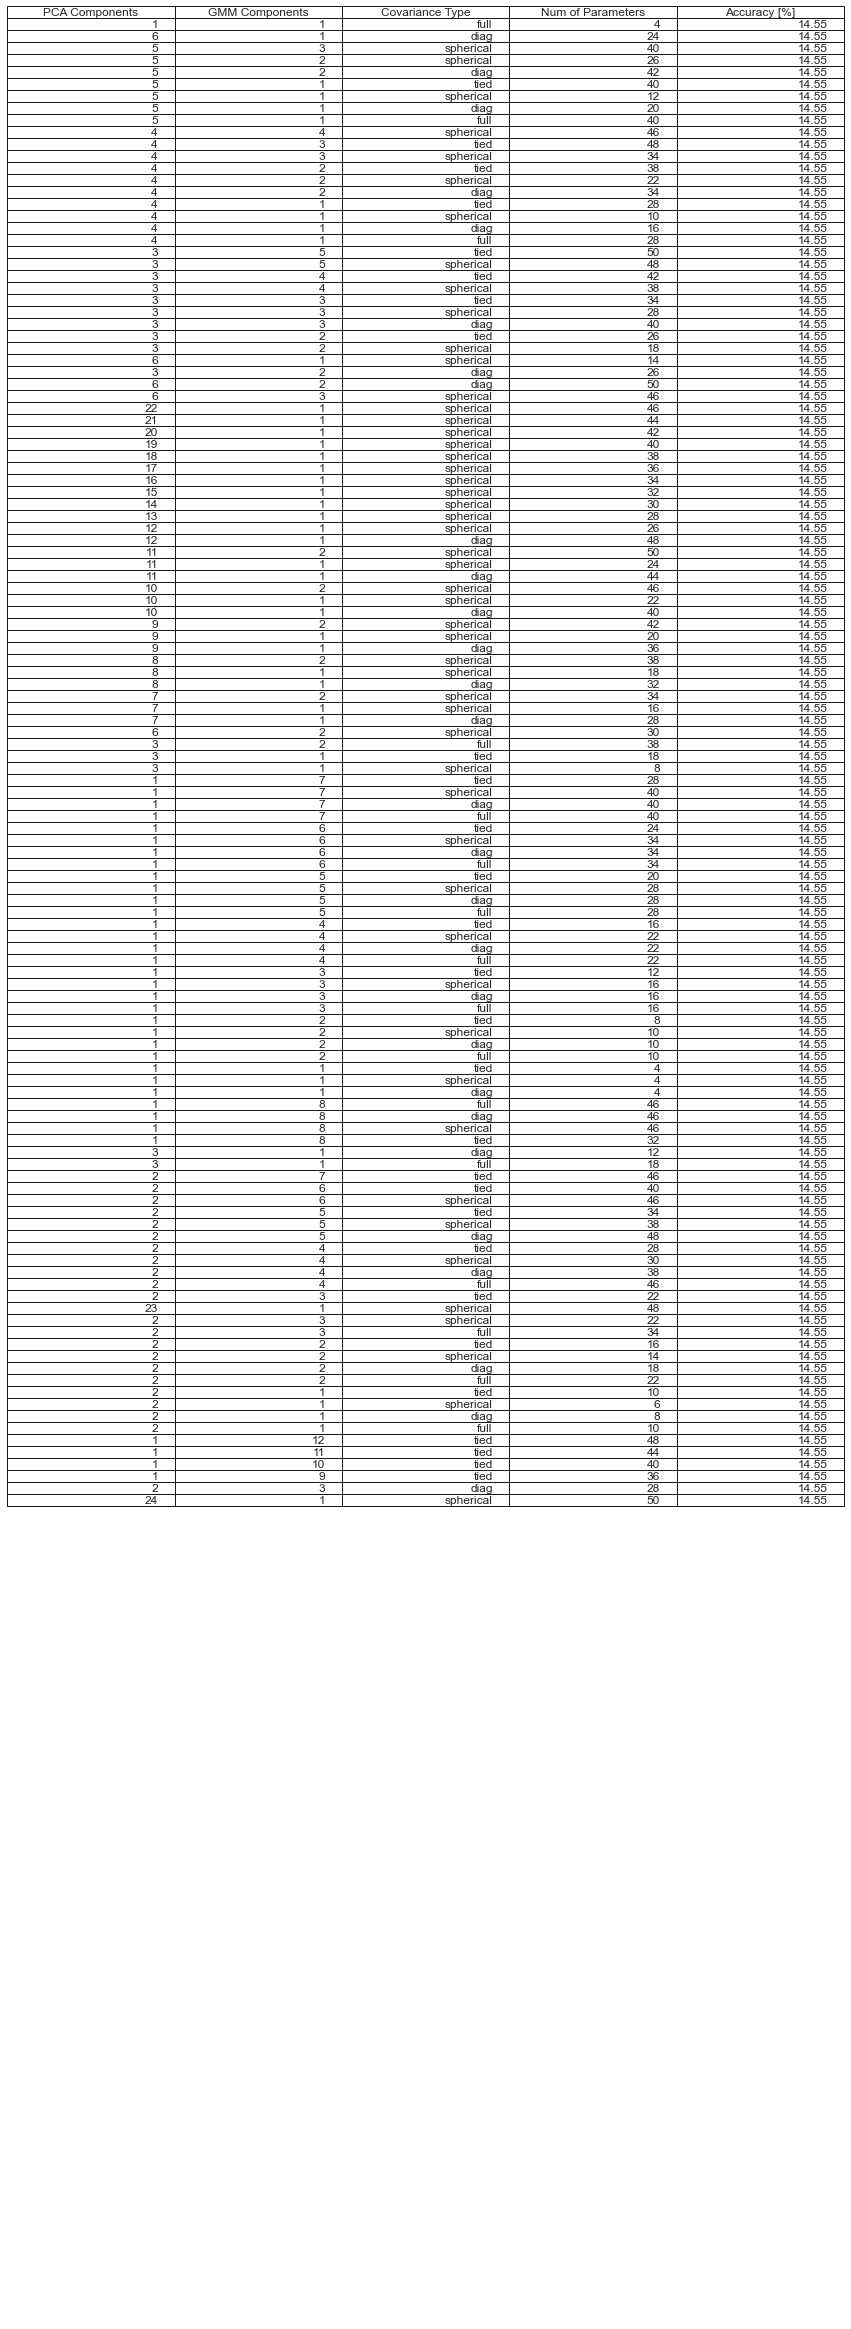

In [38]:
#Including component weights
# full = ((n_gmm - 1) +n_pca*n_gmm + n_pca (n_pca + 1)/ 2 * n_gmm) * n_classes
# diagonal = ((n_gmm - 1) +n_gmm + n_pca*n_gmm + n_pca * n_gmm) * n_classes
# spherical = ((n_gmm - 1) +n_pca*n_gmm + n_gmm) * n_classes
# tied = ((n_gmm - 1) +n_pca*n_gmm + n_pca (n_pca + 1)/ 2) * n_classes

def gmm_accuracy(pca_comps=2, gmm_components=4, covar_type='full'):
    pca = PCA(n_components=pca_comps)
    pca.fit(train_data)
    pca_data = pca.transform(train_data)
    pca_dev_data = pca.transform(dev_data)
             
    gmm_model = GaussianMixture(n_components = gmm_components, covariance_type=covar_type, random_state=12345)
        
    predictions = np.argmax(gmm_model, axis=0) + 1

    #Calculate accuracy
    accuracy=np.sum(predictions == dev_label) / len(dev_data)

    return accuracy
    
def num_parameters(pca_comps=2, gmm_comps=4, covar_type='full', num_class=2):
        
    mean_vectors = pca_comps
    mean_params = pca_comps * gmm_comps
    comp_weights = gmm_comps - 1
        
# covariance matrix from spreadsheet
    if covar_type == "full" or covar_type == "diag" or covar_type == "spherical":
        if covar_type == "full" :
            covar_mtx = (pca_comps * (pca_comps + 1)) / 2
            cov_params = gmm_comps * covar_mtx
                
        elif covar_type == "diag":
            covar_mtx = pca_comps
            cov_params = gmm_comps * covar_mtx
                
        elif covar_type == "spherical":
            covar_mtx = 1
            cov_params = gmm_comps * covar_mtx
            
    elif covar_type == "tied":
        covar_mtx = pca_comps * (pca_comps + 1) / 2
        cov_params = covar_mtx
                 
    parameters = int((mean_params + cov_params + comp_weights) * num_class)
    return parameters

columns = ['PCA Components', 'GMM Components', 'Covariance Type', "Num of Parameters", "Accuracy [%]"]
gmm_trials = []
    
num_class = 2
max_pca_comps = 25
max_gmm_comps = 25
covar_types = ['full', 'diag', 'spherical', 'tied']
    
for pca_comps in range(1, max_pca_comps):
    for gmm_comps in range(1, max_gmm_comps):
        for covar_type in covar_types:
            parameters = num_parameters(pca_comps, gmm_comps, covar_type, num_class)
            if parameters <= 50:
                accuracy = gmm_accuracy(pca_comps, gmm_comps, covar_type)
                gmm_trials.append([pca_comps, gmm_comps, covar_type, parameters, round(accuracy*100, 2)])
                    

#GMM Trial results, sort, and construct for table plot
gmm_trials = np.array(gmm_trials)
gmm_trials = gmm_trials[gmm_trials[:,4].argsort()]
    
concat_var = (f'The best accuracy of {gmm_trials[-1,4]}% was obtained using'
                  f' {gmm_trials[-1,1]} GMM component with a {gmm_trials[-1,2]} covariance type,'
                  f' and {gmm_trials[-1,0]} PCA components')
print(concat_var)

print(f'Table with experiment results')
    
#Print and plot accuracies of the experiments
plt.figure(figsize=(15, 15))
ax = plt.gca()
ax.axis('off')
plt.table(cellText=gmm_trials, colLabels=columns, loc="top")
plt.show()
    